##連結Google Dribe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## (第一次才需執行)Generate custom "point_clouds_t_0.15.npy", "point_clouds_labels_t_0.15.npy" 來訓練

In [ ]:
import pandas as pd
import numpy as np
import os

directory = '/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/'
groups = ['甘草','當歸','薄荷','白术','牡丹皮']

#參數設定
#############################################################
num_files = 200
# 藥物名稱
LABELS = ['甘草','當歸','薄荷','白术','牡丹皮']
# 對應顏色
COLORS = ['blue', 'green', 'red' ,'black' , 'purple']


# 訓練和驗證集比例
VAL_SPLIT = 0.15
# 每份資料取點數目
NUM_SAMPLE_POINTS = 4096
# NUM_SAMPLE_POINTS = len(point_clouds[0])
#############################################################

point_clouds = []
point_cloud_labels = []
all_labels = []

temp_point_clouds_labels_array = []
temp_all_labels_array = []

for file_index in range(1, num_files+1):

    for group in groups:
        temp_point_clouds_array = []
        file_path = os.path.join(directory, f'{group}/{group}_noi-{file_index}.csv')
        print(file_path)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df = df.rename(columns={"Wavelength": "Time"})
            if(group == '白术' or  group =='薄荷' or group == '當歸'):
            # wavelength明顯沿著時間取每10點
              df = df.iloc[:,::5]
            elif (group == '牡丹皮'):
              df = df.iloc[:,::10]
            else:
            # 沿著wavelength取每10點
              df = df.iloc[::5,:]
            # print(df)
            df = df.melt(id_vars=["Time"], var_name="Wavelength", value_name="Height")

            df["Height"] = pd.to_numeric(df["Height"], errors='coerce')
            df = df.dropna(subset=["Height"])
# 將小於0.15的，沒有代表性的資料捨去
            df_filtered = df[df["Height"] >= 0.1]

# random sample

# Perform random sampling on the "Wavelength" column
            #random_times紀錄random_sample選取的indices
            filtered_array = df_filtered.to_numpy()

            result_array = filtered_array

            temp_point_clouds_array.append(result_array)
            temp_point_clouds_labels_array.append(groups.index(group))
            # print(temp_point_clouds_labels_array)
# 處理好一個class的array
            temp_point_clouds_array = np.vstack(temp_point_clouds_array)
            point_clouds.append(temp_point_clouds_array.astype(float))
            # temp_all_labels_array.extend([group] * result_array.shape[0])

print(f"finish {file_index}")
#在所有的array加入之後，把sequence轉換成array
temp_point_clouds_labels_array = np.array(temp_point_clouds_labels_array)
# temp_all_labels_array = np.array(temp_all_labels_array)


point_cloud_labels.append(temp_point_clouds_labels_array.astype(float))
            # all_labels.append(temp_all_labels_array.astype("U10"))


print("Files saved successfully.")
print(point_clouds)
print(point_cloud_labels)

# print(point_clouds.shape)
# print(point_cloud_labels.shape)



/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-1.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-1.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-1.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-1.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-1.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-2.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-2.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-2.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-2.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-2.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-3.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-3.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-3.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-3.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-3.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-4.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-4.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-4.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-4.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-4.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-5.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-5.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-5.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-5.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-5.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-6.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-6.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-6.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-6.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-6.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-7.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-7.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-7.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-7.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-7.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-8.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-8.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-8.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-8.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-8.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-9.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-9.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-9.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-9.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-9.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-10.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-10.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-10.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-10.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-10.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-11.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-11.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-11.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-11.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-11.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-12.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-12.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-12.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-12.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-12.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-13.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-13.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-13.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-13.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-13.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-14.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-14.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-14.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-14.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-14.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-15.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-15.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-15.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-15.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-15.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-16.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-16.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-16.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-16.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-16.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-17.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-17.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-17.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-17.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-17.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-18.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-18.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-18.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-18.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-18.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-19.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-19.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-19.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-19.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-19.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-20.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-20.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-20.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-20.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-20.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-21.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-21.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-21.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-21.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-21.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-22.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-22.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-22.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-22.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-22.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-23.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-23.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-23.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-23.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-23.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-24.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-24.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-24.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-24.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-24.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-25.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-25.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-25.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-25.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-25.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-26.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-26.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-26.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-26.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-26.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-27.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-27.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-27.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-27.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-27.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-28.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-28.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-28.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-28.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-28.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-29.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-29.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-29.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-29.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-29.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-30.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-30.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-30.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-30.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-30.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-31.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-31.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-31.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-31.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-31.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-32.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-32.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-32.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-32.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-32.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-33.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-33.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-33.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-33.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-33.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-34.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-34.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-34.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-34.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-34.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-35.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-35.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-35.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-35.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-35.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-36.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-36.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-36.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-36.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-36.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-37.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-37.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-37.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-37.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-37.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-38.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-38.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-38.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-38.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-38.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-39.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-39.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-39.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-39.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-39.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-40.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-40.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-40.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-40.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-40.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-41.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-41.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-41.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-41.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-41.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-42.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-42.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-42.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-42.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-42.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-43.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-43.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-43.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-43.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-43.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-44.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-44.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-44.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-44.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-44.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-45.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-45.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-45.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-45.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-45.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-46.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-46.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-46.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-46.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-46.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-47.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-47.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-47.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-47.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-47.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-48.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-48.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-48.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-48.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-48.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-49.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-49.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-49.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-49.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-49.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-50.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-50.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-50.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-50.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-50.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-51.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-51.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-51.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-51.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-51.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-52.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-52.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-52.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-52.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-52.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-53.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-53.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-53.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-53.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-53.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-54.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-54.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-54.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-54.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-54.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-55.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-55.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-55.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-55.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-55.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-56.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-56.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-56.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-56.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-56.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-57.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-57.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-57.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-57.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-57.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-58.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-58.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-58.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-58.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-58.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-59.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-59.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-59.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-59.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-59.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-60.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-60.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-60.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-60.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-60.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-61.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-61.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-61.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-61.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-61.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-62.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-62.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-62.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-62.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-62.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-63.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-63.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-63.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-63.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-63.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-64.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-64.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-64.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-64.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-64.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-65.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-65.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-65.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-65.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-65.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-66.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-66.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-66.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-66.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-66.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-67.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-67.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-67.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-67.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-67.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-68.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-68.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-68.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-68.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-68.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-69.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-69.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-69.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-69.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-69.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-70.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-70.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-70.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-70.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-70.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-71.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-71.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-71.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-71.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-71.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-72.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-72.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-72.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-72.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-72.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-73.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-73.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-73.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-73.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-73.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-74.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-74.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-74.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-74.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-74.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-75.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-75.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-75.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-75.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-75.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-76.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-76.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-76.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-76.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-76.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-77.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-77.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-77.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-77.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-77.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-78.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-78.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-78.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-78.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-78.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-79.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-79.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-79.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-79.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-79.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-80.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-80.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-80.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-80.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-80.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-81.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-81.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-81.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-81.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-81.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-82.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-82.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-82.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-82.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-82.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-83.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-83.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-83.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-83.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-83.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-84.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-84.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-84.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-84.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-84.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-85.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-85.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-85.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-85.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-85.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-86.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-86.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-86.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-86.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-86.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-87.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-87.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-87.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-87.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-87.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-88.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-88.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-88.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-88.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-88.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-89.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-89.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-89.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-89.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-89.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-90.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-90.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-90.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-90.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-90.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-91.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-91.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-91.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-91.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-91.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-92.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-92.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-92.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-92.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-92.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-93.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-93.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-93.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-93.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-93.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-94.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-94.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-94.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-94.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-94.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-95.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-95.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-95.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-95.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-95.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-96.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-96.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-96.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-96.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-96.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-97.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-97.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-97.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-97.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-97.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-98.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-98.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-98.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-98.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-98.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-99.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-99.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-99.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-99.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-99.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-100.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-100.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-100.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-100.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-100.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-101.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-101.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-101.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-101.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-101.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-102.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-102.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-102.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-102.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-102.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-103.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-103.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-103.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-103.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-103.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-104.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-104.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-104.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-104.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-104.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-105.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-105.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-105.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-105.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-105.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-106.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-106.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-106.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-106.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-106.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-107.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-107.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-107.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-107.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-107.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-108.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-108.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-108.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-108.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-108.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-109.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-109.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-109.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-109.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-109.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-110.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-110.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-110.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-110.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-110.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-111.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-111.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-111.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-111.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-111.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-112.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-112.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-112.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-112.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-112.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-113.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-113.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-113.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-113.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-113.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-114.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-114.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-114.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-114.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-114.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-115.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-115.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-115.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-115.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-115.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-116.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-116.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-116.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-116.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-116.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-117.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-117.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-117.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-117.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-117.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-118.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-118.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-118.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-118.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-118.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-119.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-119.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-119.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-119.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-119.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-120.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-120.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-120.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-120.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-120.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-121.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-121.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-121.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-121.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-121.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-122.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-122.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-122.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-122.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-122.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-123.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-123.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-123.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-123.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-123.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-124.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-124.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-124.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-124.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-124.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-125.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-125.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-125.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-125.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-125.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-126.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-126.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-126.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-126.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-126.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-127.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-127.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-127.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-127.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-127.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-128.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-128.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-128.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-128.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-128.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-129.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-129.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-129.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-129.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-129.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-130.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-130.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-130.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-130.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-130.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-131.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-131.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-131.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-131.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-131.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-132.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-132.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-132.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-132.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-132.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-133.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-133.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-133.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-133.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-133.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-134.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-134.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-134.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-134.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-134.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-135.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-135.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-135.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-135.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-135.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-136.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-136.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-136.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-136.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-136.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-137.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-137.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-137.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-137.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-137.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-138.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-138.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-138.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-138.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-138.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-139.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-139.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-139.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-139.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-139.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-140.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-140.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-140.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-140.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-140.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-141.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-141.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-141.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-141.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-141.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-142.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-142.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-142.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-142.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-142.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-143.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-143.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-143.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-143.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-143.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-144.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-144.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-144.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-144.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-144.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-145.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-145.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-145.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-145.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-145.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-146.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-146.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-146.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-146.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-146.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-147.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-147.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-147.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-147.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-147.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-148.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-148.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-148.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-148.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-148.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-149.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-149.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-149.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-149.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-149.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-150.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-150.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-150.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-150.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-150.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-151.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-151.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-151.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-151.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-151.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-152.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-152.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-152.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-152.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-152.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-153.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-153.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-153.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-153.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-153.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-154.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-154.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-154.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-154.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-154.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-155.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-155.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-155.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-155.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-155.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-156.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-156.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-156.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-156.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-156.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-157.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-157.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-157.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-157.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-157.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-158.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-158.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-158.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-158.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-158.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-159.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-159.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-159.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-159.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-159.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-160.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-160.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-160.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-160.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-160.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-161.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-161.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-161.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-161.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-161.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-162.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-162.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-162.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-162.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-162.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-163.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-163.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-163.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-163.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-163.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-164.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-164.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-164.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-164.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-164.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-165.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-165.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-165.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-165.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-165.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-166.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-166.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-166.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-166.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-166.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-167.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-167.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-167.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-167.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-167.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-168.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-168.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-168.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-168.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-168.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-169.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-169.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-169.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-169.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-169.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-170.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-170.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-170.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-170.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-170.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-171.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-171.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-171.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-171.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-171.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-172.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-172.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-172.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-172.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-172.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-173.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-173.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-173.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-173.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-173.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-174.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-174.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-174.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-174.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-174.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-175.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-175.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-175.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-175.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-175.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-176.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-176.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-176.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-176.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-176.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-177.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-177.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-177.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-177.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-177.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-178.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-178.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-178.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-178.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-178.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-179.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-179.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-179.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-179.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-179.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-180.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-180.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-180.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-180.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-180.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-181.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-181.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-181.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-181.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-181.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-182.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-182.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-182.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-182.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-182.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-183.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-183.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-183.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-183.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-183.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-184.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-184.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-184.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-184.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-184.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-185.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-185.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-185.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-185.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-185.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-186.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-186.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-186.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-186.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-186.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-187.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-187.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-187.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-187.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-187.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-188.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-188.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-188.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-188.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-188.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-189.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-189.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-189.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-189.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-189.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-190.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-190.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-190.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-190.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-190.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-191.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-191.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-191.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-191.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-191.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-192.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-192.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-192.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-192.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-192.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-193.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-193.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-193.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-193.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-193.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-194.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-194.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-194.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-194.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-194.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-195.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-195.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-195.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-195.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-195.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-196.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-196.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-196.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-196.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-196.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-197.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-197.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-197.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-197.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-197.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-198.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-198.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-198.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-198.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-198.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-199.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-199.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-199.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-199.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-199.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/甘草/甘草_noi-200.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/當歸/當歸_noi-200.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-200.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-200.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-200.csv


<ipython-input-36-3b9f7f605cc6>:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


串流輸出內容已截斷至最後 5000 行。
       [6.93500000e+01, 3.71026000e+02, 1.30563458e-01],
       [6.93666700e+01, 3.71026000e+02, 1.19451222e-01],
       [6.93833300e+01, 3.71026000e+02, 1.04074567e-01]]), array([[2.80000000e+00, 1.94155000e+02, 1.08485079e-01],
       [2.81666700e+00, 1.94155000e+02, 1.63011903e-01],
       [2.83333300e+00, 1.94155000e+02, 2.32206543e-01],
       ...,
       [3.80000000e+01, 3.65003000e+02, 1.20267432e-01],
       [3.80166700e+01, 3.65003000e+02, 1.13272725e-01],
       [3.80333300e+01, 3.65003000e+02, 1.01749371e-01]]), array([[2.66666700e+00, 1.94155000e+02, 1.37780356e-01],
       [2.68333300e+00, 1.94155000e+02, 3.54179868e-01],
       [2.70000000e+00, 1.94155000e+02, 5.65193682e-01],
       ...,
       [3.26666700e+00, 3.48498000e+02, 1.31299122e-01],
       [3.25000000e+00, 3.54495000e+02, 1.09178482e-01],
       [3.26666700e+00, 3.54495000e+02, 1.12517042e-01]]), array([[2.70000000e+00, 2.00030000e+02, 1.23366442e-01],
       [2.71666700e+00, 2.00030000e+0

In [ ]:
# for k in range (200):
for k in range (1000):
   point_clouds[k] = np.array(point_clouds[k])

point_cloud_labels = point_cloud_labels[0]
print(point_clouds)
print(point_cloud_labels)
print(all_labels)

[array([[2.83333300e+00, 1.89458000e+02, 1.91235085e-01],
       [3.08333300e+00, 1.89458000e+02, 1.32801570e-01],
       [3.41666700e+00, 1.89458000e+02, 2.27932323e-01],
       ...,
       [4.40000000e+01, 3.69821000e+02, 1.00360786e-01],
       [4.40000000e+01, 3.71026000e+02, 1.02131970e-01],
       [4.40000000e+01, 3.72231000e+02, 1.04136528e-01]]), array([[2.66666700e+00, 1.94155000e+02, 2.47034360e-01],
       [2.68333300e+00, 1.94155000e+02, 1.16906434e+00],
       [2.70000000e+00, 1.94155000e+02, 2.23551429e+00],
       ...,
       [6.93500000e+01, 3.71026000e+02, 1.50609834e-01],
       [6.93666700e+01, 3.71026000e+02, 1.31357828e-01],
       [6.93833300e+01, 3.71026000e+02, 1.14393008e-01]]), array([[2.80000000e+00, 1.94155000e+02, 1.02448082e-01],
       [2.81666700e+00, 1.94155000e+02, 1.64410090e-01],
       [2.83333300e+00, 1.94155000e+02, 2.27035469e-01],
       ...,
       [3.80000000e+01, 3.65003000e+02, 1.16867092e-01],
       [3.80166700e+01, 3.65003000e+02, 1.15279

In [ ]:
from tqdm import tqdm
import random
for index in tqdm(range(len(point_clouds))):
    current_point_cloud = point_clouds[index]

    num_points = len(current_point_cloud)
    # Randomly sampling respective indices.
    print(range(num_points))
    sampled_indices = random.sample(list(range(num_points)), 120)
    # Sampling points corresponding to sampled indices.
    sampled_point_cloud = np.array([current_point_cloud[i] for i in sampled_indices])
    # Normalizing sampled point cloud.
    norm_point_cloud = sampled_point_cloud - np.mean(sampled_point_cloud, axis=0)

    norm_point_cloud /= np.max(np.linalg.norm(norm_point_cloud, axis=1))
    # point_clouds[index] = np.resize(point_clouds[index],(2048,3))
    point_clouds[index] = norm_point_cloud


  7%|▋         | 74/1000 [00:00<00:01, 735.24it/s]

range(0, 1783)
range(0, 1121)
range(0, 1233)
range(0, 450)
range(0, 1631)
range(0, 1607)
range(0, 1079)
range(0, 1424)
range(0, 500)
range(0, 1579)
range(0, 1836)
range(0, 848)
range(0, 1058)
range(0, 478)
range(0, 1607)
range(0, 1040)
range(0, 1195)
range(0, 1522)
range(0, 455)
range(0, 1249)
range(0, 1311)
range(0, 1206)
range(0, 1481)
range(0, 405)
range(0, 1755)
range(0, 1069)
range(0, 915)
range(0, 1007)
range(0, 410)
range(0, 1564)
range(0, 1310)
range(0, 864)
range(0, 1171)
range(0, 597)
range(0, 1380)
range(0, 1089)
range(0, 1177)
range(0, 1043)
range(0, 577)
range(0, 1357)
range(0, 1356)
range(0, 1225)
range(0, 1419)
range(0, 508)
range(0, 1752)
range(0, 1383)
range(0, 842)
range(0, 1524)
range(0, 405)
range(0, 1605)
range(0, 1160)
range(0, 999)
range(0, 1456)
range(0, 504)
range(0, 1567)
range(0, 1567)
range(0, 830)
range(0, 1064)
range(0, 528)
range(0, 1392)
range(0, 1078)
range(0, 1083)
range(0, 1080)
range(0, 410)
range(0, 1468)
range(0, 1760)
range(0, 1170)
range(0, 1494)

 26%|██▌       | 258/1000 [00:00<00:00, 867.50it/s]

range(0, 468)
range(0, 1705)
range(0, 1090)
range(0, 842)
range(0, 1517)
range(0, 422)
range(0, 1612)
range(0, 1837)
range(0, 855)
range(0, 1048)
range(0, 530)
range(0, 1626)
range(0, 1631)
range(0, 1021)
range(0, 1239)
range(0, 445)
range(0, 1670)
range(0, 1309)
range(0, 1158)
range(0, 1459)
range(0, 504)
range(0, 1625)
range(0, 1167)
range(0, 1070)
range(0, 1488)
range(0, 492)
range(0, 1280)
range(0, 1619)
range(0, 1007)
range(0, 1192)
range(0, 444)
range(0, 1722)
range(0, 1346)
range(0, 936)
range(0, 986)
range(0, 592)
range(0, 1391)
range(0, 1674)
range(0, 838)
range(0, 1047)
range(0, 445)
range(0, 1711)
range(0, 1798)
range(0, 1041)
range(0, 1108)
range(0, 447)
range(0, 1349)
range(0, 1108)
range(0, 1061)
range(0, 1357)
range(0, 430)
range(0, 1731)
range(0, 1642)
range(0, 1088)
range(0, 1183)
range(0, 490)
range(0, 1492)
range(0, 1221)
range(0, 874)
range(0, 1360)
range(0, 459)
range(0, 1660)
range(0, 1077)
range(0, 1034)
range(0, 1321)
range(0, 490)
range(0, 1674)
range(0, 1835)


 35%|███▍      | 348/1000 [00:00<00:00, 879.88it/s]

range(0, 406)
range(0, 1611)
range(0, 1554)
range(0, 917)
range(0, 1526)
range(0, 499)
range(0, 1601)
range(0, 1111)
range(0, 1179)
range(0, 1246)
range(0, 598)
range(0, 1748)
range(0, 1594)
range(0, 1105)
range(0, 1090)
range(0, 522)
range(0, 1404)
range(0, 1697)
range(0, 1043)
range(0, 1012)
range(0, 417)
range(0, 1235)
range(0, 1300)
range(0, 873)
range(0, 1417)
range(0, 442)
range(0, 1517)
range(0, 1162)
range(0, 1060)
range(0, 1186)


 44%|████▎     | 436/1000 [00:00<00:00, 866.16it/s]

range(0, 414)
range(0, 1604)
range(0, 1323)
range(0, 924)
range(0, 1077)
range(0, 553)
range(0, 1700)
range(0, 1556)
range(0, 1107)
range(0, 1478)
range(0, 567)
range(0, 1288)
range(0, 1708)
range(0, 1107)
range(0, 1038)
range(0, 489)
range(0, 1658)
range(0, 1313)
range(0, 1052)
range(0, 1496)
range(0, 575)
range(0, 1554)
range(0, 1120)
range(0, 1022)
range(0, 1067)
range(0, 405)
range(0, 1621)
range(0, 1595)
range(0, 901)
range(0, 1499)
range(0, 562)
range(0, 1553)
range(0, 1720)
range(0, 1036)
range(0, 1240)
range(0, 527)
range(0, 1556)
range(0, 1692)
range(0, 997)
range(0, 1093)
range(0, 573)
range(0, 1603)
range(0, 1199)
range(0, 958)
range(0, 1401)
range(0, 415)
range(0, 1739)
range(0, 1098)
range(0, 1192)
range(0, 1194)
range(0, 458)
range(0, 1710)
range(0, 1651)
range(0, 1161)
range(0, 1249)
range(0, 402)
range(0, 1306)
range(0, 1109)
range(0, 1020)
range(0, 1491)
range(0, 551)
range(0, 1743)
range(0, 1346)
range(0, 1039)
range(0, 1512)
range(0, 504)
range(0, 1412)
range(0, 1093

 53%|█████▎    | 529/1000 [00:00<00:00, 886.68it/s]

range(0, 1525)
range(0, 400)
range(0, 1703)
range(0, 1485)
range(0, 1129)
range(0, 1510)
range(0, 470)
range(0, 1442)
range(0, 1345)
range(0, 897)
range(0, 1162)
range(0, 427)
range(0, 1621)
range(0, 1751)
range(0, 1026)
range(0, 1431)
range(0, 501)
range(0, 1333)
range(0, 1577)
range(0, 1216)
range(0, 1109)
range(0, 438)
range(0, 1768)
range(0, 1118)
range(0, 988)
range(0, 1406)
range(0, 435)
range(0, 1309)
range(0, 1340)
range(0, 1039)
range(0, 1500)


 62%|██████▏   | 618/1000 [00:00<00:00, 863.37it/s]

range(0, 401)
range(0, 1789)
range(0, 1760)
range(0, 907)
range(0, 1372)
range(0, 507)
range(0, 1487)
range(0, 1759)
range(0, 1029)
range(0, 1535)
range(0, 489)
range(0, 1649)
range(0, 1339)
range(0, 999)
range(0, 1322)
range(0, 414)
range(0, 1797)
range(0, 1624)
range(0, 859)
range(0, 1038)
range(0, 538)
range(0, 1537)
range(0, 1520)
range(0, 1174)
range(0, 1251)
range(0, 484)
range(0, 1777)
range(0, 1608)
range(0, 1096)
range(0, 1367)
range(0, 392)
range(0, 1670)
range(0, 1142)
range(0, 896)
range(0, 1398)
range(0, 408)
range(0, 1708)
range(0, 1055)
range(0, 1127)
range(0, 1447)
range(0, 554)
range(0, 1716)
range(0, 1463)
range(0, 999)
range(0, 1077)
range(0, 397)
range(0, 1398)
range(0, 1472)
range(0, 982)
range(0, 994)
range(0, 496)
range(0, 1838)
range(0, 1371)
range(0, 950)
range(0, 998)
range(0, 552)
range(0, 1237)
range(0, 1813)
range(0, 995)
range(0, 1006)
range(0, 487)
range(0, 1327)
range(0, 1189)
range(0, 1019)
range(0, 1066)
range(0, 439)
range(0, 1535)
range(0, 1631)
rang

 70%|███████   | 705/1000 [00:00<00:00, 863.70it/s]


range(0, 1390)
range(0, 1447)
range(0, 1147)
range(0, 1430)
range(0, 563)
range(0, 1548)
range(0, 1577)
range(0, 872)
range(0, 1479)
range(0, 464)
range(0, 1581)
range(0, 1485)
range(0, 918)
range(0, 1164)
range(0, 447)
range(0, 1798)
range(0, 1265)
range(0, 1025)
range(0, 1420)
range(0, 549)
range(0, 1339)
range(0, 1456)
range(0, 1086)
range(0, 1326)
range(0, 568)
range(0, 1386)
range(0, 1084)
range(0, 1052)
range(0, 1405)
range(0, 436)
range(0, 1421)


 79%|███████▉  | 792/1000 [00:00<00:00, 828.92it/s]

range(0, 1271)
range(0, 1105)
range(0, 1383)
range(0, 444)
range(0, 1755)
range(0, 1142)
range(0, 1073)
range(0, 1186)
range(0, 434)
range(0, 1600)
range(0, 1146)
range(0, 1053)
range(0, 1013)
range(0, 445)
range(0, 1559)
range(0, 1340)
range(0, 1218)
range(0, 1423)
range(0, 475)
range(0, 1319)
range(0, 1672)
range(0, 982)
range(0, 1419)
range(0, 428)
range(0, 1370)
range(0, 1254)
range(0, 1024)
range(0, 1430)
range(0, 565)
range(0, 1715)
range(0, 1814)
range(0, 1145)
range(0, 1148)
range(0, 536)
range(0, 1514)
range(0, 1389)
range(0, 1121)
range(0, 1275)
range(0, 433)
range(0, 1450)
range(0, 1824)
range(0, 1097)
range(0, 1035)
range(0, 433)
range(0, 1584)
range(0, 1072)
range(0, 1121)
range(0, 1305)
range(0, 442)
range(0, 1357)
range(0, 1574)
range(0, 895)
range(0, 1138)
range(0, 559)
range(0, 1346)
range(0, 1833)
range(0, 844)
range(0, 1016)
range(0, 456)
range(0, 1645)
range(0, 1563)
range(0, 833)
range(0, 1501)
range(0, 423)
range(0, 1229)
range(0, 1665)
range(0, 891)
range(0, 1420

 96%|█████████▌| 957/1000 [00:01<00:00, 786.36it/s]

range(0, 397)
range(0, 1376)
range(0, 1179)
range(0, 1200)
range(0, 1554)
range(0, 421)
range(0, 1803)
range(0, 1627)
range(0, 1085)
range(0, 1468)
range(0, 489)
range(0, 1318)
range(0, 1516)
range(0, 873)
range(0, 1171)
range(0, 462)
range(0, 1635)
range(0, 1465)
range(0, 846)
range(0, 1157)
range(0, 526)
range(0, 1644)
range(0, 1700)
range(0, 1062)
range(0, 1016)
range(0, 582)
range(0, 1383)
range(0, 1447)
range(0, 1221)
range(0, 1334)
range(0, 415)
range(0, 1428)
range(0, 1366)
range(0, 867)
range(0, 1173)
range(0, 471)
range(0, 1321)
range(0, 1599)
range(0, 1005)
range(0, 1514)
range(0, 449)
range(0, 1517)
range(0, 1104)
range(0, 992)
range(0, 1284)
range(0, 424)
range(0, 1649)
range(0, 1848)
range(0, 1194)
range(0, 1501)
range(0, 489)
range(0, 1355)
range(0, 1792)
range(0, 914)
range(0, 1070)
range(0, 539)
range(0, 1467)
range(0, 1759)
range(0, 1001)
range(0, 1235)
range(0, 512)
range(0, 1389)
range(0, 1372)
range(0, 1132)
range(0, 1172)
range(0, 436)
range(0, 1590)
range(0, 1288)

100%|██████████| 1000/1000 [00:01<00:00, 822.75it/s]

range(0, 1499)
range(0, 1661)
range(0, 1102)
range(0, 1484)
range(0, 485)
range(0, 1272)


In [ ]:
np.save(os.path.join(directory, 'point_clouds_thres_0.1_class5_for_classification_120points.npy'), point_clouds)
np.save(os.path.join(directory, 'point_cloud_labels_thres_0.1_class5_for_classification_120points.npy'), point_cloud_labels)

##載入資料和處理


In [ ]:
print(point_clouds.shape)
print(point_cloud_labels.shape)

(1000, 120, 3)
(1000,)


In [ ]:
import numpy as np


#my data
point_clouds = np.load('/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/point_clouds_thres_0.1_class5_for_classification_120points.npy',allow_pickle=True)
point_cloud_labels = np.load('/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/point_cloud_labels_thres_0.1_class5_for_classification_120points.npy',allow_pickle= True)
# point_cloud_labels = point_cloud_labels[0]


## 資料正規化

#參數設定

In [ ]:
# 原本是300，因為4個點數量有些少，所以改成200
NUM_POINTS = 120
NUM_CLASSES = 5
BATCH_SIZE = 64

In [ ]:
#將資料進行正規化
# temp_point_clouds = point_clouds
# point_clouds = []
# for point_cloud in temp_point_clouds:
from tqdm import tqdm
import random
for index in tqdm(range(len(point_clouds))):
    current_point_cloud = point_clouds[index]
    num_points = len(current_point_cloud)
    # Randomly sampling respective indices.
    sampled_indices = random.sample(list(range(num_points)), NUM_POINTS)
    # Sampling points corresponding to sampled indices.
    sampled_point_cloud = np.array([current_point_cloud[i] for i in sampled_indices])
    # Sampling corresponding one-hot encoded labels.


    # Normalizing sampled point cloud.
    norm_point_cloud = sampled_point_cloud - np.mean(sampled_point_cloud, axis=0)
    norm_point_cloud /= np.max(np.linalg.norm(norm_point_cloud, axis=1))
    point_clouds[index] = norm_point_cloud

100%|██████████| 1000/1000 [00:00<00:00, 1981.17it/s]


In [ ]:
#把point_clouds和lable分成測試及和訓練集
# train_points= point_clouds[:237]
# test_points= point_clouds[237:]
# train_labels= point_cloud_labels[:237]
# test_labels= point_cloud_labels[237:]


train_points= point_clouds[:337]
test_points= point_clouds[337:]
train_labels= point_cloud_labels[:337]
test_labels= point_cloud_labels[337:]

# with my data
# train_points= point_clouds_t_015[:237]
# test_points= point_clouds_t_015[237:]
# train_labels= point_clouds_labels_t_015[:237]
# test_labels= point_clouds_labels_t_015[237:]

#設定每個class對應的數字
CLASS_MAP = {0:'fanfong',1:'dongue',2:'boho',3:'baisu',4:'baibu'}
# 藥物名稱
LABELS = ['防風','當歸','薄荷','白术','百部']
# 對應顏色
COLORS = ['blue', 'green', 'red' ,'black' , 'purple']

# **訓練開始**

In [ ]:
!pip install trimesh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.7/694.7 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install keras_core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
import os
import glob
import trimesh
import numpy as np
from tensorflow import data as tf_data
import keras
from keras import layers
from matplotlib import pyplot as plt
import tensorflow
import keras_core

keras.utils.set_random_seed(seed=42)

Using TensorFlow backend


In [ ]:
def augment(points, label):
    # jitter points
    points += tensorflow.random.uniform(points.shape, -0.005, 0.005, dtype="float64")
    # shuffle points
    points = tensorflow.random.shuffle(points)
    return points, label


train_size = 0.8
dataset = tf_data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf_data.Dataset.from_tensor_slices((test_points, test_labels))
train_dataset_size = int(len(dataset) * train_size)

dataset = dataset.shuffle(len(train_points)).map(augment)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

train_dataset = dataset.take(train_dataset_size).batch(BATCH_SIZE)
validation_dataset = dataset.skip(train_dataset_size).batch(BATCH_SIZE)

In [ ]:

def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)

In [ ]:

class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = keras_core.ops.eye(num_features)

    def __call__(self, x):
        x = keras_core.ops.reshape(x, (-1, self.num_features, self.num_features))
        xxt = keras_core.ops.tensordot(x, x, axes=(2, 2))
        xxt = keras_core.ops.reshape(xxt, (-1, self.num_features, self.num_features))
        return keras_core.ops.sum(self.l2reg * keras_core.ops.square(xxt - self.eye))

In [ ]:

def tnet(inputs, num_features):
    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])

In [ ]:
inputs = keras.Input(shape=(NUM_POINTS, 3))

x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 120, 3)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 120, 32)              128       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 120, 32)              128       ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 120, 32)              0         ['batch_normalization[0

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.000005),
    metrics=["sparse_categorical_accuracy"],
)


history = model.fit(train_dataset, epochs=200, validation_data=validation_dataset)

Epoch 1/200
5/5 [==============================] - 16s 601ms/step - loss: 6.4265 - sparse_categorical_accuracy: 0.1673 - val_loss: 6.2148 - val_sparse_categorical_accuracy: 0.1471
Epoch 2/200
5/5 [==============================] - 3s 499ms/step - loss: 6.2164 - sparse_categorical_accuracy: 0.1822 - val_loss: 5.6283 - val_sparse_categorical_accuracy: 0.3088
Epoch 3/200
5/5 [==============================] - 3s 559ms/step - loss: 6.0830 - sparse_categorical_accuracy: 0.2454 - val_loss: 5.3513 - val_sparse_categorical_accuracy: 0.4412
Epoch 4/200
5/5 [==============================] - 2s 353ms/step - loss: 5.9767 - sparse_categorical_accuracy: 0.2268 - val_loss: 5.2886 - val_sparse_categorical_accuracy: 0.5441
Epoch 5/200
5/5 [==============================] - 2s 404ms/step - loss: 5.8315 - sparse_categorical_accuracy: 0.3197 - val_loss: 5.4645 - val_sparse_categorical_accuracy: 0.3382
Epoch 6/200
5/5 [==============================] - 2s 471ms/step - loss: 5.6578 - sparse_categorical_acc

1/1 [==============================] - 0s 31ms/step


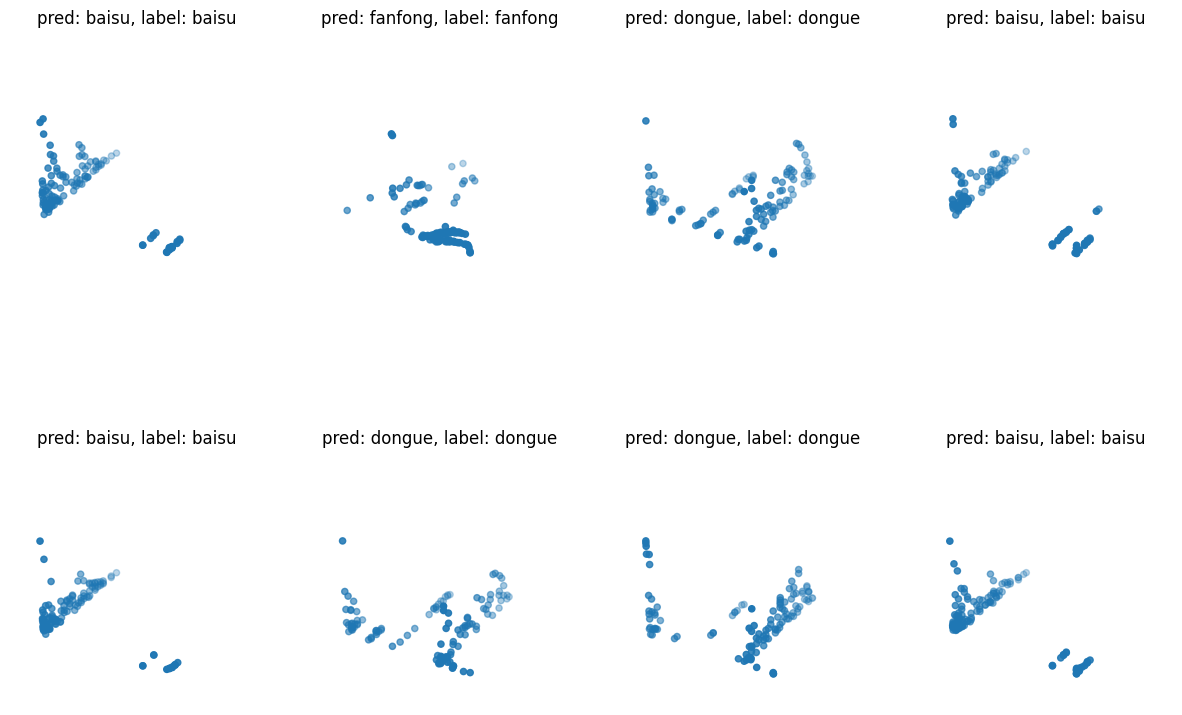

In [ ]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:8, ...]
labels = labels[:8, ...]

# run test data through model
preds = model.predict(points)
preds = keras_core.ops.argmax(preds, -1)

points = points.numpy()

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
        )
    )
    ax.set_axis_off()
plt.show()

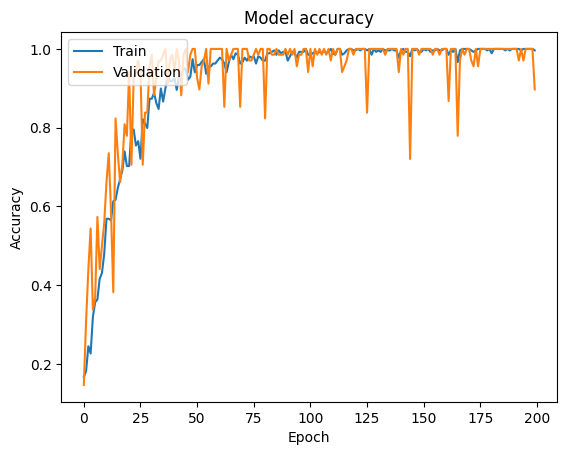

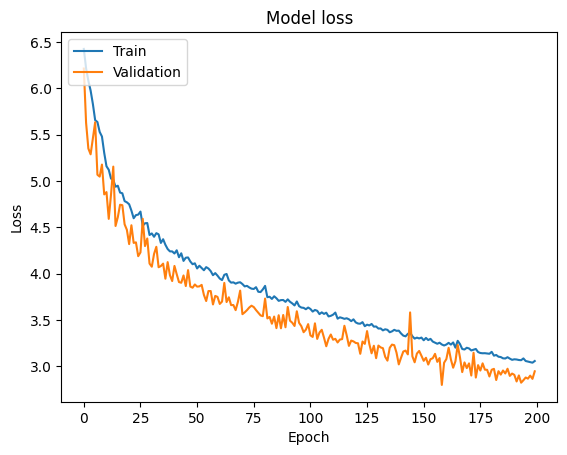

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#預測分割後資料

In [ ]:
import numpy as np
#載入事先儲存好之data，記得要正規化
test_points= np.load('/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/point_clouds_thres_0.1_for_classification_5kind_120points.npy')
test_labels= np.load('/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/point_clouds_labels_thres_0.1_for_classification_5kind_120points.npy')


In [ ]:
print(test_points.shape)
print(test_labels.shape)

(150, 120, 3)
(150,)


In [ ]:
def augment(points, label):
    # jitter points
    points += tensorflow.random.uniform(points.shape, -0.005, 0.005, dtype="float64")
    # shuffle points
    points = tensorflow.random.shuffle(points)
    return points, label


train_size = 0.8
dataset = tf_data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf_data.Dataset.from_tensor_slices((test_points, test_labels))
train_dataset_size = int(len(dataset) * train_size)

dataset = dataset.shuffle(len(train_points)).map(augment)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

train_dataset = dataset.take(train_dataset_size).batch(BATCH_SIZE)
validation_dataset = dataset.skip(train_dataset_size).batch(BATCH_SIZE)

2/2 [==============================] - 0s 53ms/step


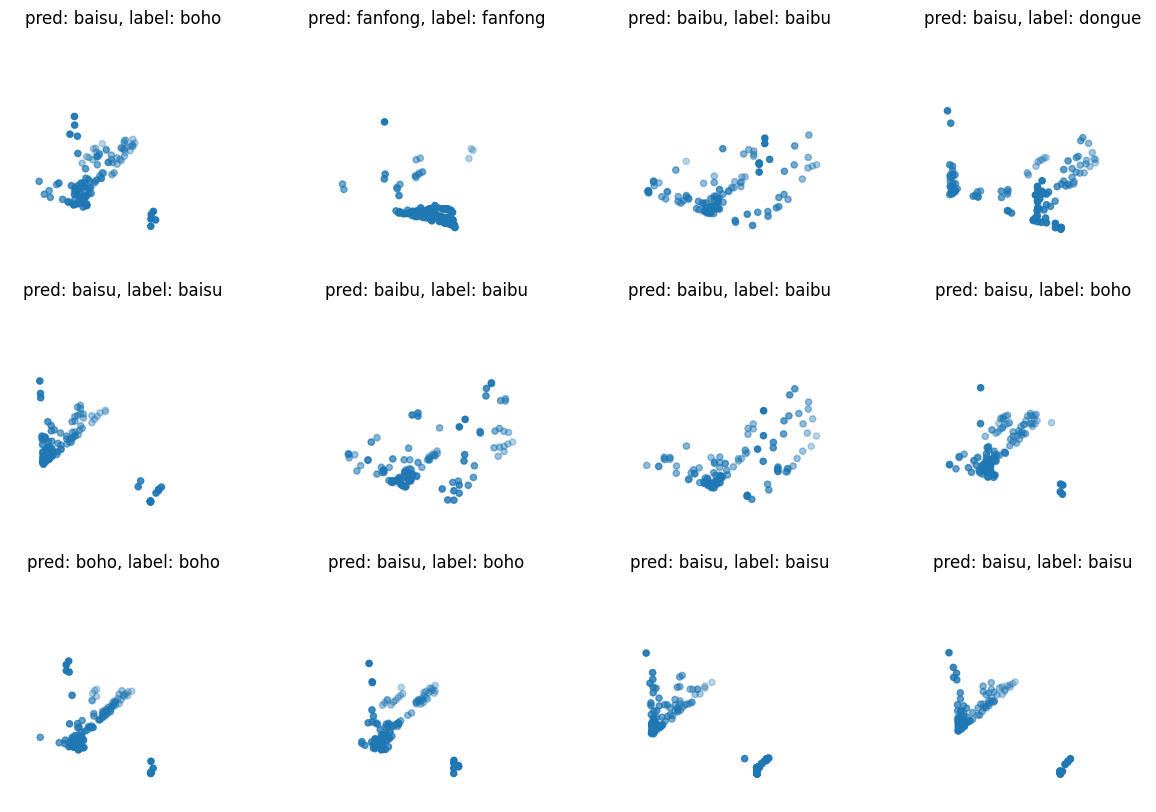

In [ ]:
data = test_dataset.take(1)

points, labels = list(data)[0]


# run test data through model
preds = model.predict(points)
preds = keras_core.ops.argmax(preds, -1)

points = points.numpy()

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
        )
    )
    ax.set_axis_off()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'labels' and 'preds' are NumPy arrays
accuracy = accuracy_score(labels, preds)
precision = precision_score(labels, preds, average='macro')                       # Adjust 'average' as needed
recall = recall_score(labels, preds, average='macro')                          # Adjust 'average' as needed
f1 = f1_score(labels, preds, average='macro')                              # Adjust 'average' as needed

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.765625
Precision: 0.8881226053639846
Recall: 0.7212121212121212
F1-score: 0.736171802054155


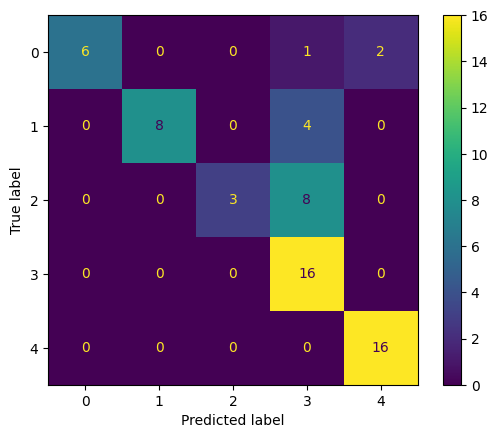

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()